<a href="https://colab.research.google.com/github/swapnilmungi/Azure_Olympic_Data_Analysis/blob/main/Co2_Emissions_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import itertools

In [ ]:
import requests
import pandas as pd
from io import BytesIO

url = 'https://www.eia.gov/electricity/annual/xls/epa_09_01.xlsx'

response = requests.get(url)

if response.status_code == 200:
    df_ = pd.read_excel(BytesIO(response.content))
else:
    print('Failed to fetch data:', response.status_code)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MER_T12_06 (1).csv')

In [ ]:
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [ ]:
date_clean = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv('/content/drive/MyDrive/MER_T12_06 (1).csv', parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=date_clean)
df.head()

<ipython-input-6-6e208e961823>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('/content/drive/MyDrive/MER_T12_06 (1).csv', parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=date_clean)


,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [ ]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [ ]:
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

<ipython-input-8-50a976d84284>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')


,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [ ]:
ts.dropna(inplace = True)

<ipython-input-9-93e1d3aba894>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.dropna(inplace = True)


In [ ]:
group = ts.groupby('Description')
group.head(5)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


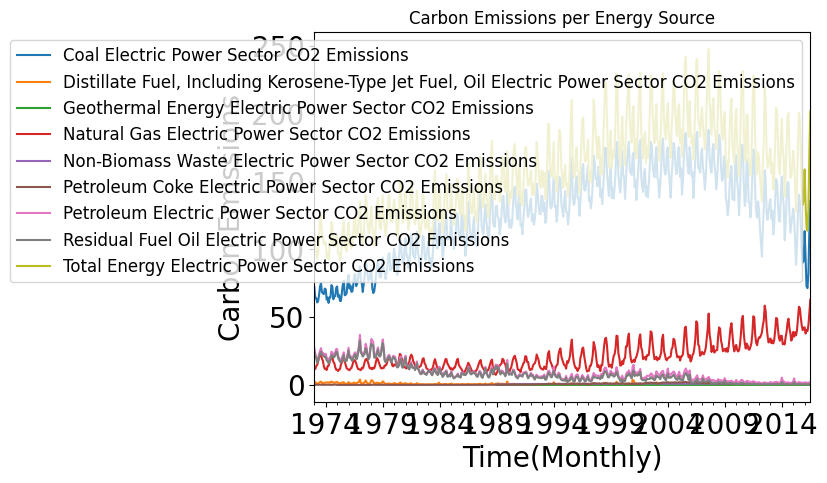

In [ ]:
fig, ax = plt.subplots()
for desc, group in group:
    group.plot(y='Value', label=desc,ax = ax, title='Carbon Emissions per Energy Source', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 12)

In [ ]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()
CO2_per_source.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [ ]:
lab = ['Geothermal', 'Non-Biomass Waste', 'Petroleum Coke ','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

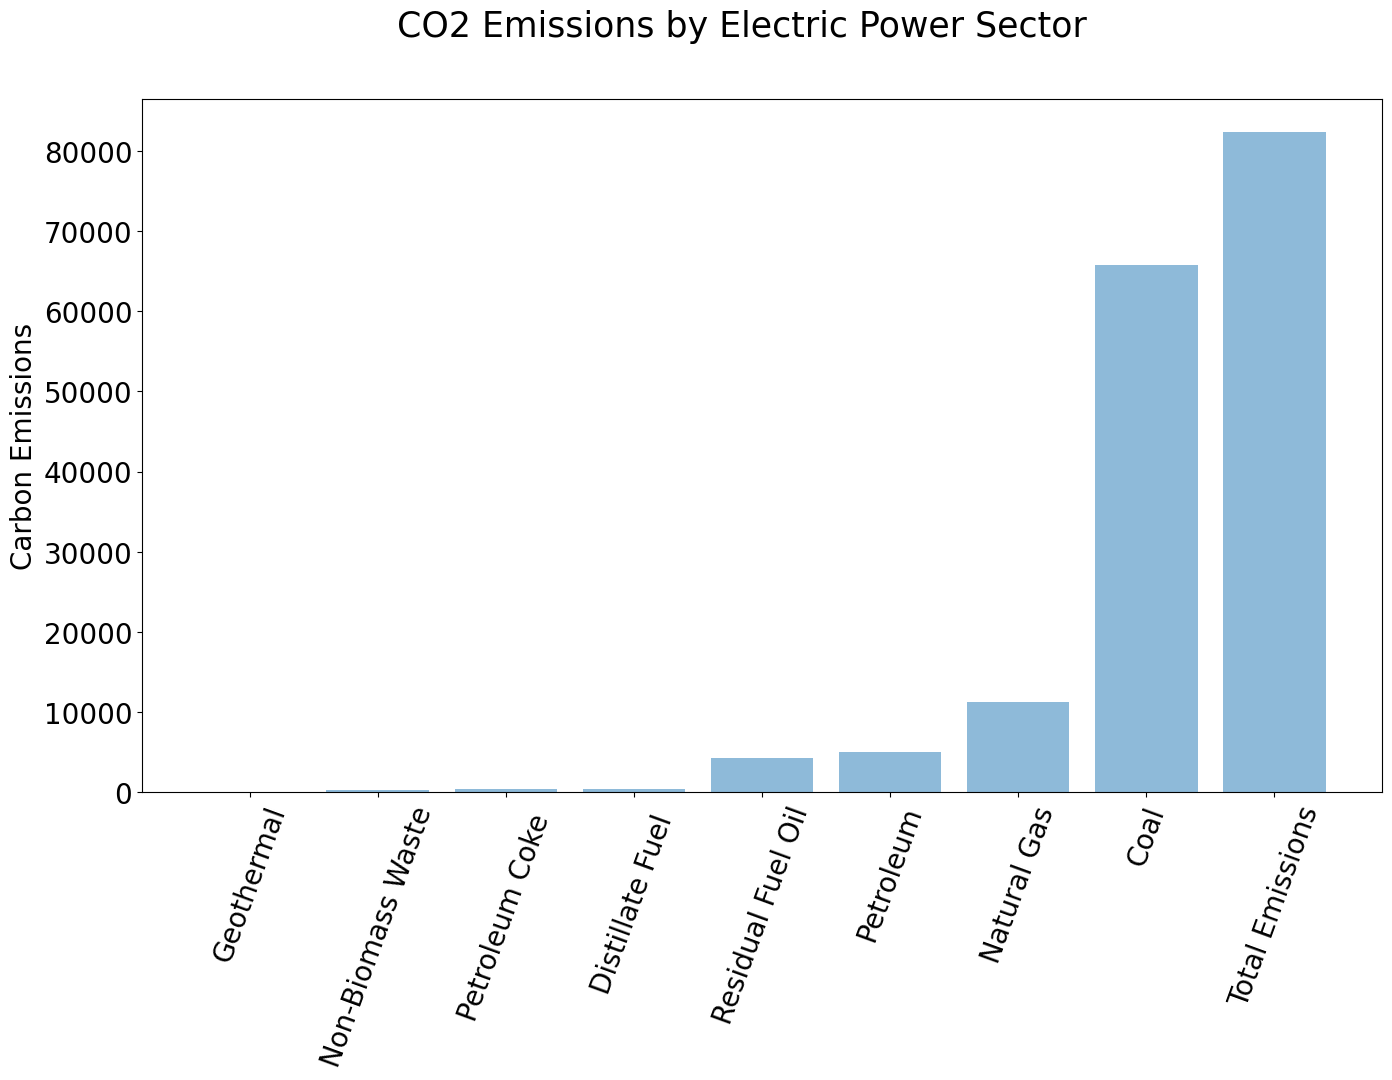

In [ ]:
fig = plt.figure(figsize = (16,9))
x_label = lab
x_tick = np.arange(len(lab))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Carbon Emissions', fontsize = 20)
plt.show()

In [ ]:
Emissions = ts.iloc[:,1:]
Emissions= Emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)
me = Emissions['Natural Gas Electric Power Sector CO2 Emissions']
me.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [ ]:
Emissions.head()

Description,Coal Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Geothermal Energy Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,Non-Biomass Waste Electric Power Sector CO2 Emissions,Petroleum Coke Electric Power Sector CO2 Emissions,Petroleum Electric Power Sector CO2 Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
YYYYMM,,,,,,,,,
1973-01-31,72.076,2.375,NaN,12.175,NaN,0.128,27.369,24.867,111.621
1973-02-28,64.442,2.061,NaN,11.708,NaN,0.106,23.034,20.867,99.185
1973-03-31,64.084,1.171,NaN,13.994,NaN,0.083,21.034,19.780,99.112
1973-04-30,60.842,1.022,NaN,14.627,NaN,0.130,17.714,16.562,93.183
1973-05-31,61.798,0.949,NaN,17.344,NaN,0.167,18.870,17.754,98.012


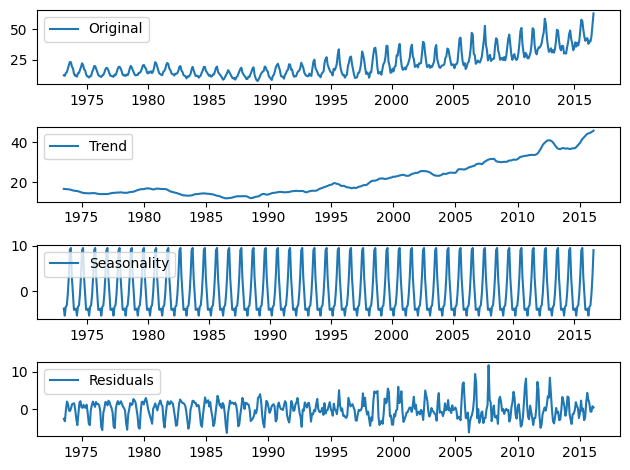

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(me)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(me, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
import statsmodels
import statsmodels.api as sm

In [ ]:
mod = sm.tsa.statespace.SARIMAX(me,
                                order=(1,1,1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Wed, 01 May 2024   AIC                           2003.553
Time:                                                     01:21:36   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [ ]:

pred = results.get_prediction(start = 480, end = 522, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
YYYYMM,,
2013-01-31,30.203833,37.257323
2013-02-28,29.088378,36.141868
2013-03-31,28.958983,36.012473
2013-04-30,30.708072,37.761562
2013-05-31,32.104077,39.157567


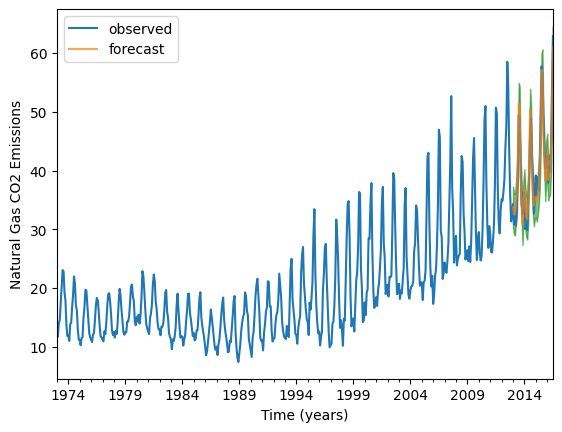

In [ ]:
ax = me['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Natural Gas CO2 Emissions')
plt.legend()

plt.show()

In [ ]:
me_pred = pred.predicted_mean
me_truth = me['2013-01-31':]

# Compute the mean square error
mse = ((me_pred - me_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((me_pred-me_truth)**2)/len(me_pred))))

The Mean Squared Error (MSE) of the forecast is 4.09
The Root Mean Square Error (RMSE) of the forcast: 2.0236


In [ ]:
forecast = results.get_forecast(steps= 240)
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2016-08-31,58.062558,65.116048
2016-09-30,47.316613,55.987495
2016-10-31,40.736069,50.163094
2016-11-30,36.175919,46.010286
2016-12-31,38.095106,48.172696


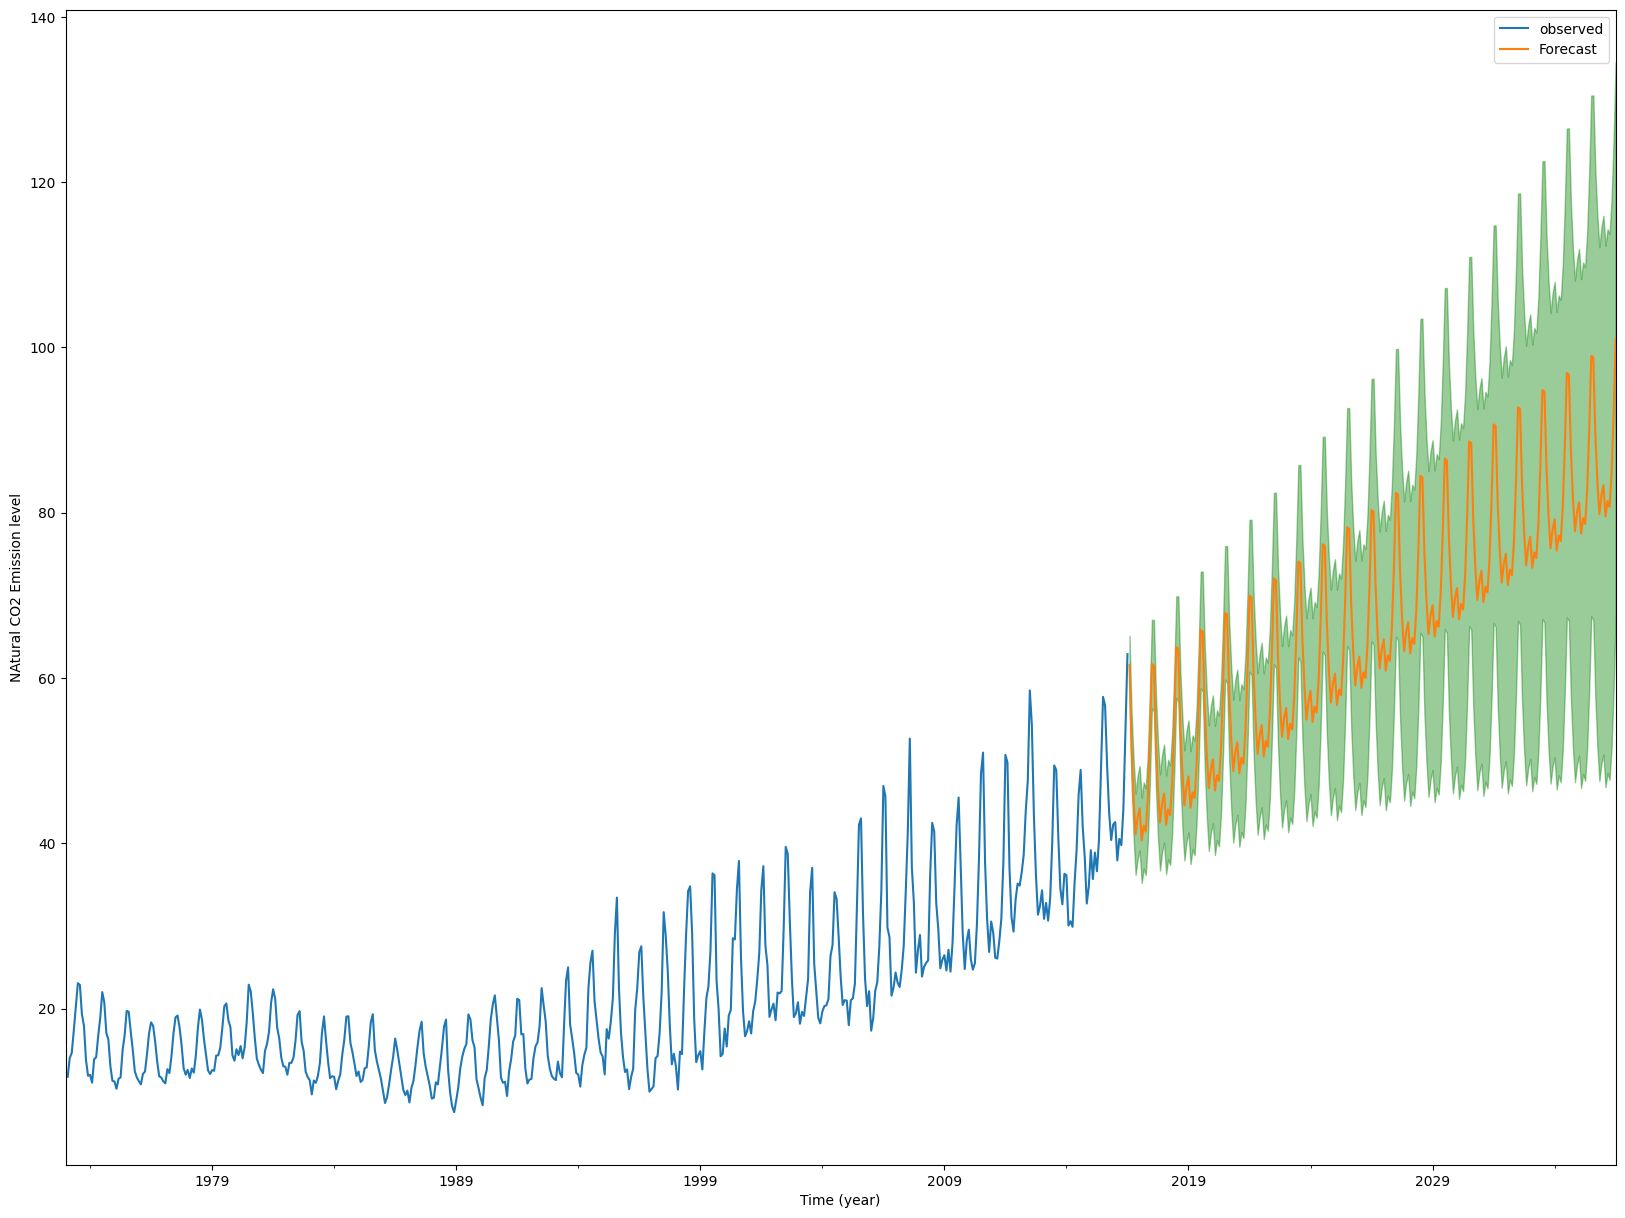

In [ ]:
ax = me.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NAtural CO2 Emission level')

plt.legend()
plt.show()

# Forecasting model for Coal CO2 Emissions

In [ ]:
Em_coal = ts.iloc[:,1:]
Em_coal= Em_coal.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)
me_coal = Emissions['Coal Electric Power Sector CO2 Emissions']
me_coal.head()

YYYYMM
1973-01-31    72.076
1973-02-28    64.442
1973-03-31    64.084
1973-04-30    60.842
1973-05-31    61.798
Freq: M, Name: Coal Electric Power Sector CO2 Emissions, dtype: float64

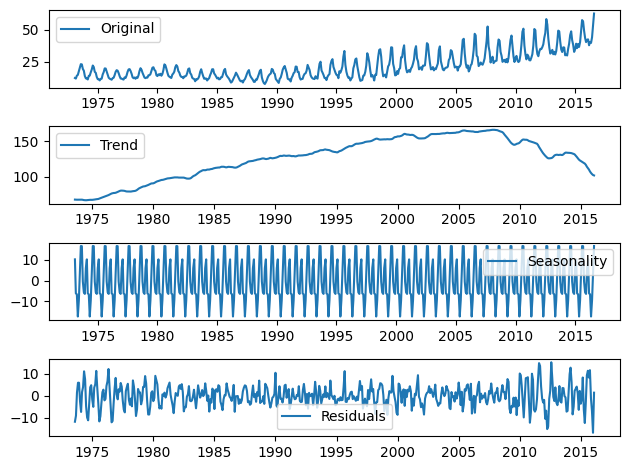

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(me_coal)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(me, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
mod_coal = sm.tsa.statespace.SARIMAX(me_coal,
                                order=(1,1,1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_coal = mod_coal.fit()
print(results.summary())

                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Tue, 30 Apr 2024   AIC                           2003.553
Time:                                                     14:46:42   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
forecast_coal = results_coal.get_forecast(steps= 120)
forecast_ci_coal = forecast_coal.conf_int()
forecast_ci_coal.head()

,lower Coal Electric Power Sector CO2 Emissions,upper Coal Electric Power Sector CO2 Emissions
2016-08-31,121.185869,139.474152
2016-09-30,96.233035,118.805345
2016-10-31,81.252374,105.996231
2016-11-30,79.176019,105.257015
2016-12-31,89.522087,116.548523


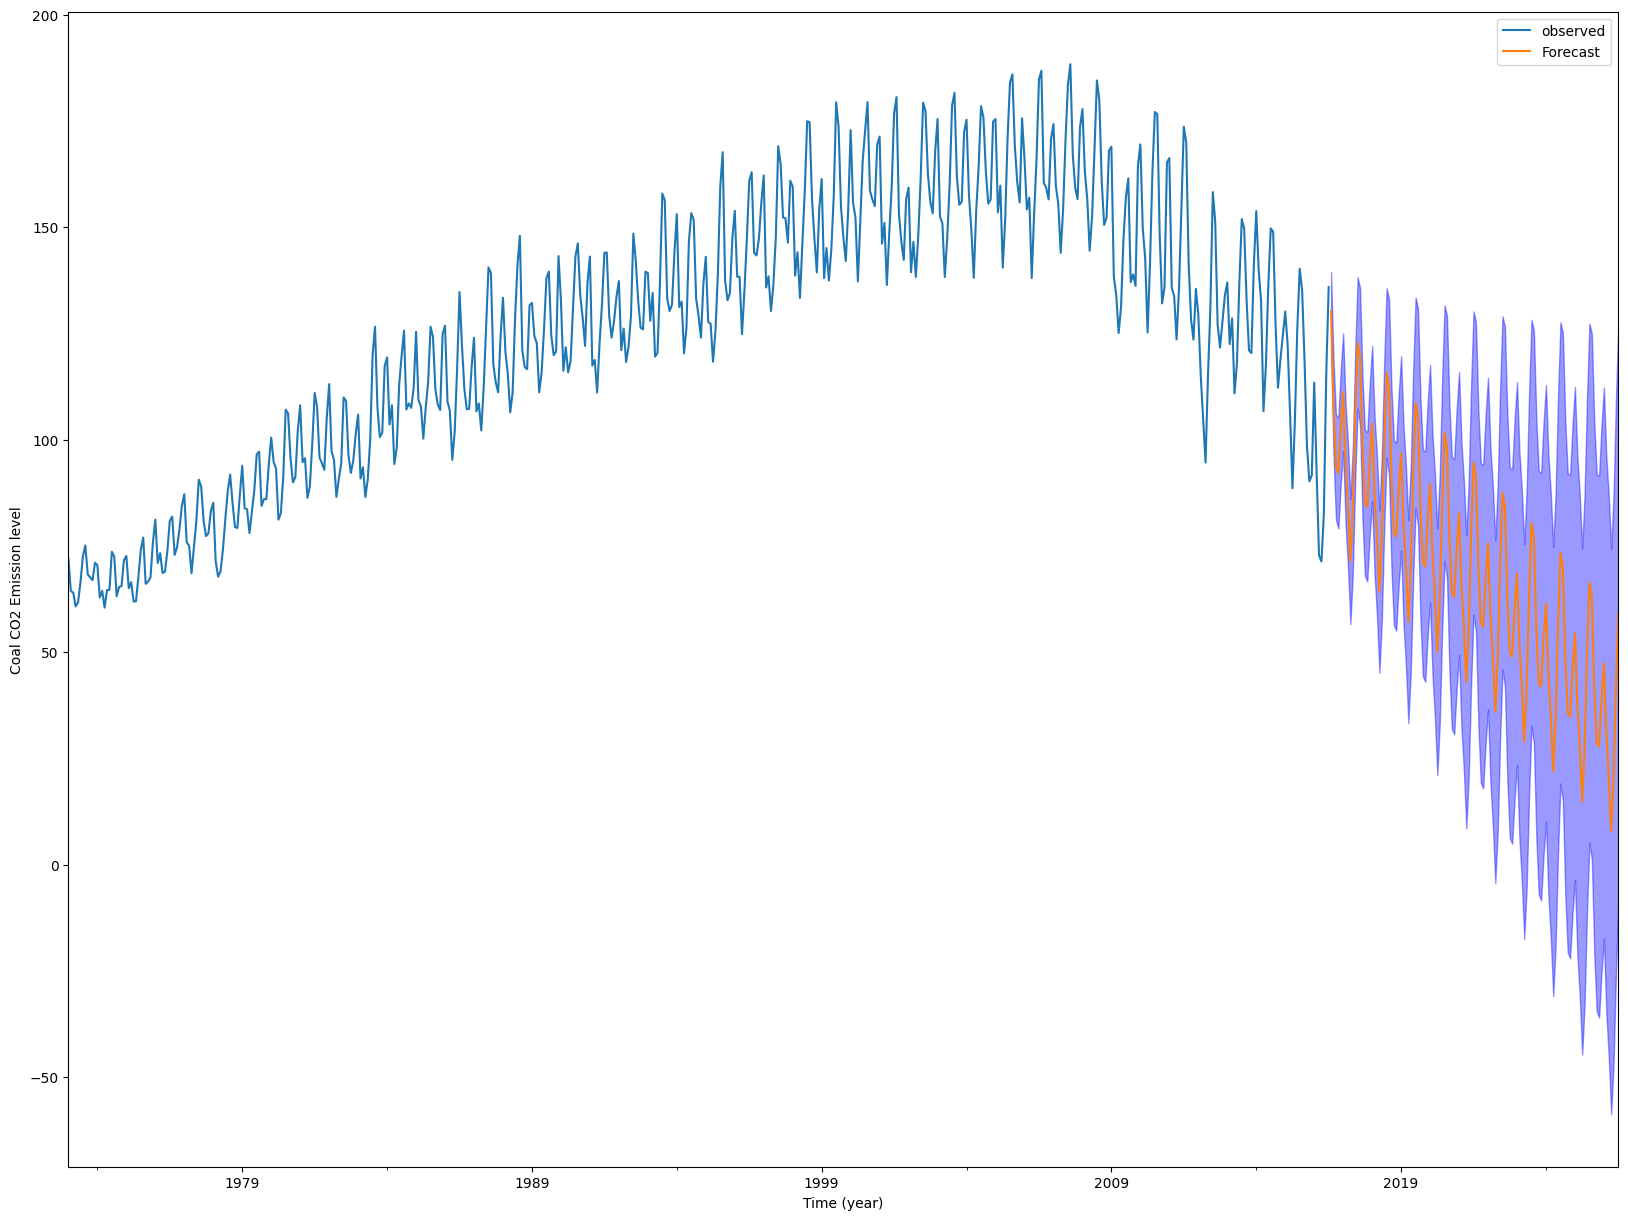

In [ ]:
ax = me_coal.plot(label='observed', figsize=(20, 15))
forecast_coal.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci_coal.index,
                forecast_ci_coal.iloc[:, 0],
                forecast_ci_coal.iloc[:, 1], color='b', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('Coal CO2 Emission level')

plt.legend()
plt.show()